<a href="https://colab.research.google.com/github/rezendervp/chemical-engineering/blob/main/Entropia_exemplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Entropia total de sistema com transferência de calor**

  Demonstração do aumento da entropia durante um processo de transferência de calor entre dois recipientes em contato e isolados do ambiente.

  A transferência de calor ocorre devido à diferença de temperatura $\Delta T$ entre os reservatórios, e ela ocorre até a temperatura de equilíbrio,  $T_{eq}$ - que é intermediária à máxima e à minima temperatura: $T_{B} < T_{eq} < T_{A}$. 
  Neste ponto, temos a maior variação possível de entropia para este sistema. 

O cálculo começa com a importação da biblioteca numpy necessária a criação de vetores (arrays) para armazenamento das variáveis, bem como das funções matemáticas como $log()$, por exemplo.

In [28]:
#IMportanção da numpy

import numpy as np

#constante universal dos gases em S.I
R = 8.314 #J/k.mol (cte dos gases)

In [29]:
# condição inicial em A

TAo = 92.0 + 273.15 #K
VA = 1.0 #m³
nA = 50.0 #mol

In [30]:
# condição inicial em B

TBo = 28.0 + 273.15 #K
VB = 3.0 #m³
nB = 300.0 #mol

Entropias inicials calculadas a partir das entropias de referência: 

$S_{A}^{o} = S_{A}^{ref} + n_{A} C_{v}^{A} \log (\frac{T_{A}^{o}}{T_{A}^{ref}})$

 e

$S_{B}^{o} = S_{B}^{ref} + n_{B} C_{v}^{B} \log (\frac{T_{B}^{o}}{T_{B}^{ref}})$

As entropias de referência são necessárias para podermos inicar os cálculos. A sua escolha é arbitrária. Normalmente é feita em uma condição padrão, como $25°C$ e $1 atm$. Assim as condições inicias são calculadas em relação a ela. Seja qual for a referência, o $\Delta S$ será o mesmo, pois todos os cálculos são em relação a este referencial. 


In [31]:
# Entropias Iniciais So

#Sistema A
Cv_N2 = 21.0 #J/mol.K
Sref_N2 = 0.0 #J/K
Tref_N2 = 25.0 +273.15 #K
SAo = Sref_N2 + nA*Cv_N2*np.log(TAo/Tref_N2)

#Sistema B
Cv_CO2 = 29.0 #J/mol.K
Sref_CO2 = 0.0 #J/K
Tref_CO2 = 25.0 +273.15 #K
SBo = Sref_CO2 + nB*Cv_CO2*np.log(TBo/Tref_CO2)

In [32]:
print(SAo,SBo)

212.84708812185414 87.10234610935153


In [33]:
#Entropia total inicial A + B
Stotal_o = SAo + SBo
Stotal_o

299.94943423120566

Para se fazer o gráfico não é necessário resolver as equações para uma situação específica. Basta observar o c0mportamento de $T$ e $S$  com a variação de $Q$. Assim, criam-se uma série de valores de calor $Q$ e, a partir 
disto, as demais variáveis:

In [34]:
# Cria vetor de Calor para A 

# lembre-se A está esfriando ( caso fosse Q B, a faixa seria positiva - ele está aquecendo)

QA = np.linspace(0,-100000, 100)
QA

array([      0.        ,   -1010.1010101 ,   -2020.2020202 ,
         -3030.3030303 ,   -4040.4040404 ,   -5050.50505051,
         -6060.60606061,   -7070.70707071,   -8080.80808081,
         -9090.90909091,  -10101.01010101,  -11111.11111111,
        -12121.21212121,  -13131.31313131,  -14141.41414141,
        -15151.51515152,  -16161.61616162,  -17171.71717172,
        -18181.81818182,  -19191.91919192,  -20202.02020202,
        -21212.12121212,  -22222.22222222,  -23232.32323232,
        -24242.42424242,  -25252.52525253,  -26262.62626263,
        -27272.72727273,  -28282.82828283,  -29292.92929293,
        -30303.03030303,  -31313.13131313,  -32323.23232323,
        -33333.33333333,  -34343.43434343,  -35353.53535354,
        -36363.63636364,  -37373.73737374,  -38383.83838384,
        -39393.93939394,  -40404.04040404,  -41414.14141414,
        -42424.24242424,  -43434.34343434,  -44444.44444444,
        -45454.54545455,  -46464.64646465,  -47474.74747475,
        -48484.84848485,

In [35]:
#criar demais vetores zerados

QB = np.zeros(100)
TA = np.zeros(100)
TB = np.zeros(100)
SA = np.zeros(100)
SB = np.zeros(100)
Stotal =np.zeros(100)


# **Equações de trabalho**

Para cada posição (ou valor do vetor) QA, um calor é usado para calcular T e S:

*   Temperatura de A:

  $T_{A} = T_{A}^{o} + \frac{Q_{A}}{n_{A} C_{v}^{A}}$

*   Entropia de A

  $S_{A} = S_{A}^{o} + n_{A} C_{v}^{A} \log (\frac{T_{A}}{T_{A}^{o}})$

*   Calor de B:
  $ Q_{B} = -Q_{A}$

*   Temperatura de B:

  $T_{B} = T_{B}^{o} + \frac{Q_{B}}{n_{B} C_{v}^{B}}$


*   Entropia de B

  $S_{A} = S_{A}^{o} + n_{A} C_{v}^{A} \log (\frac{T_{A}}{T_{A}^{o}})$


*  Entropia total do sistema A + B:

  $S_{total} = S_{A} + S_{B}$


Estes valores são então passados para o vetor de $T$ e $S$ de cada sistema e entropia total. 




In [36]:
#looping de cálculo

for i in range (0,100):
  TA[i] = TAo + QA[i]/(nA*Cv_N2)
  SA[i] = SAo +nA*Cv_N2*np.log(TA[i]/TAo)

  QB[i] = -QA[i]

  TB[i] = TBo + QB[i]/(nB*Cv_CO2)
  SB[i] = SBo + nB*Cv_CO2*np.log(TB[i]/TBo)

  Stotal[i] = SA[i] + SB[i]

Com todos os vetores, pode-se plotar um gráfico $xy$ para cada conjunto de variáveis que se queira:

In [37]:
# Gráficos

# importação da pyplot da biblioteca matplotlib

from matplotlib import pyplot as plt

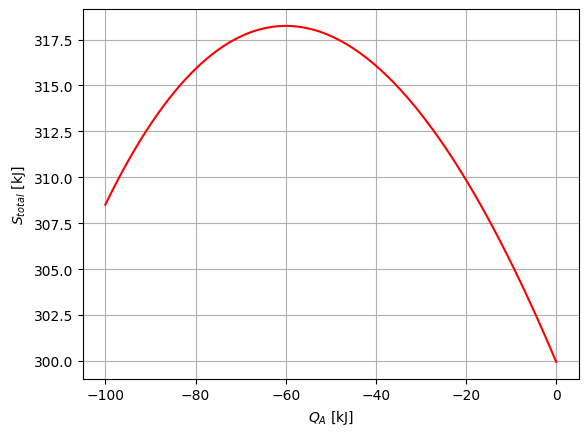

In [59]:
#figura 1

plt.plot(QA/1e3,Stotal,'r')
plt.xlabel('$Q_{A}$ [kJ]')
plt.ylabel('$S_{total}$ [kJ]')
plt.grid(True)


Na figura acima, temos a variação de Entropia com o calor trocado ou perdido por A. Note que inicicialemte $Q_{A}=0$, pois $A$ e $B$ são colocados em contado. À medida que o equilíbrio térmico se estabelece, a entropia total do sistema aumenta e atinge seu máximo próximo a aproximadamente $-60kJ$. Ou seja, o processo segue da direita para esquerda.

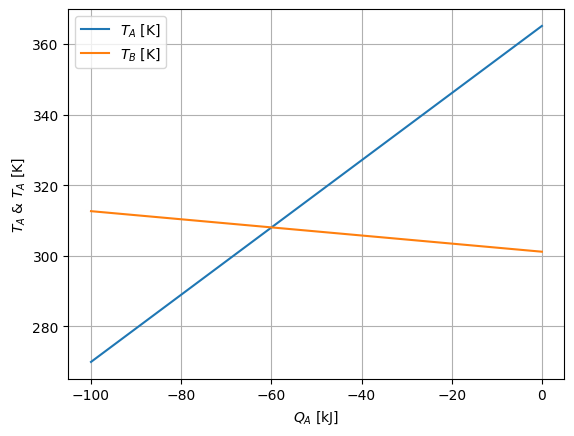

In [56]:
#figura 2

plt.plot(QA/1e3,TA, label = '$T_{A}$ [K]')
plt.plot(QA/1e3,TB,label = '$T_{B}$ [K]')
plt.xlabel('$Q_{A}$ [kJ]')
plt.ylabel('$T_{A}$ & $T_{A}$ [K]')
plt.legend()
plt.grid(True)

Na figura 2 vemos as curvas de aquecimento e resfriamento dos reservatórios $A$ e $B$. A temperatura de equilibrio ocorre perto de $Q_{A} =-60kJ$ de calor perdido por $A$. Como se pode ver, $A$ está mais quente e $B$ mais frio e o processo se dá da direita para a esquerda até $T_{eq} =308K$. 

  No gráfico há também o processo inverso: no caso de $B$ estar inicalmente mais quente que $A$, e assim o processo se daria da direita para a esquerda até o equilíbrio. 

  Por isto o gráfico de $S$ continua para antes e depois do seu máximo. Ele é válido para quando co calor vaide de $A→B$, ou de $B→A$. 

A partir da conservação da energia pode-se determinar a temperatra de equilíbrio, assim, resolvendo para o equilíbrio:

$T_{eq} = \frac{T_{A}^{o}⋅(n_{A} C_{v}^{A}) + T_{B}^{o}⋅(n_{B} C_{v}^{B})}{(n_{A} C_{v}^{A})+ (n_{B} C_{v}^{B})}$

Assim,


In [54]:
Teq = (TAo*(nA*Cv_N2)+ TBo*(nB*Cv_CO2))/((nA*Cv_N2) + (nB*Cv_CO2))
Teq-273.15  #oC

34.892307692307725

Para ilustrar como o máximo de entropia se dá na temperatura de equilíbrio, calcula-se o $\Delta T$. O Python cira autmaticamente um vetor quando uma operaão entre eles é efetuada sem declarar. É uma forma inteligente de evitar codificação desnecessária e erros de compilação. 

In [55]:
DT = (TA-TB) 
DT

array([ 64.        ,  62.92189547,  61.84379095,  60.76568642,
        59.68758189,  58.60947737,  57.53137284,  56.45326832,
        55.37516379,  54.29705926,  53.21895474,  52.14085021,
        51.06274568,  49.98464116,  48.90653663,  47.8284321 ,
        46.75032758,  45.67222305,  44.59411853,  43.516014  ,
        42.43790947,  41.35980495,  40.28170042,  39.20359589,
        38.12549137,  37.04738684,  35.96928231,  34.89117779,
        33.81307326,  32.73496873,  31.65686421,  30.57875968,
        29.50065516,  28.42255063,  27.3444461 ,  26.26634158,
        25.18823705,  24.11013252,  23.032028  ,  21.95392347,
        20.87581894,  19.79771442,  18.71960989,  17.64150537,
        16.56340084,  15.48529631,  14.40719179,  13.32908726,
        12.25098273,  11.17287821,  10.09477368,   9.01666915,
         7.93856463,   6.8604601 ,   5.78235558,   4.70425105,
         3.62614652,   2.548042  ,   1.46993747,   0.39183294,
        -0.68627158,  -1.76437611,  -2.84248064,  -3.92

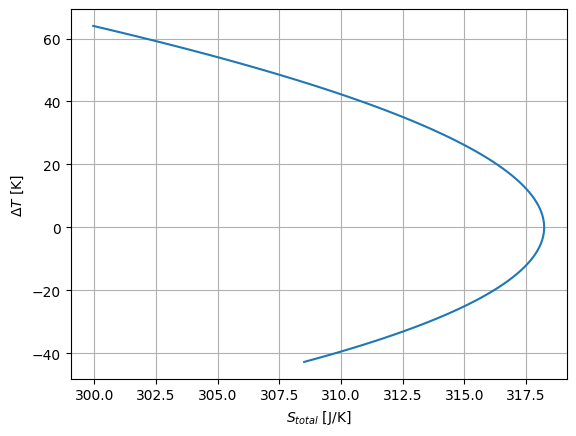

In [60]:
  # figura 3
  
plt.plot(Stotal,DT)
plt.xlabel('$S_{total}$ [J/K]')
plt.ylabel('$\Delta T$ [K] ')
plt.grid(True)

Na figura acima vemos que no máximo de entropia  $\Delta T = 0 K$

O sistema ficará neste estado indefinidamente até que uma força motriz externa  (calor ou trabalho) aja sobre ele. 

Este exemplo ilustra como a 1ª e a 2ª Leis estão relacionadas, além da conservação da energia, pois para este sistema $\Delta E =0$, uma vez que ele está isolado das vizinhanças. 

A diferença de temperaturas é a força motriz que faz com que a energia flua na forma de calor de A para B, e este processo segue até que umaa temperatra de equilíbrio seja atingida - que é nos é familiar. Mas neste ponto a entropia é máxima (o que não é óbvio apenas se deixando observar o processo) e a energia está homogeneamente distribuida nos dois compartimentos. 





Copyright ©2023 Prof. Ricardo Vicente de Paula Rezende